
Pracical Questions


In [1]:
# Train a Decision Tree Classifier and print accuracy
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
y_train_cls = y_train_cls.ravel()

clf = DecisionTreeClassifier()
clf.fit(X_train_cls, y_train_cls)
print("Accuracy:", accuracy_score(y_test_cls, clf.predict(X_test_cls)))

Accuracy: 0.9444444444444444


In [2]:
# Train using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train_cls, y_train_cls)
print("Feature Importances (Gini):", clf_gini.feature_importances_)

Feature Importances (Gini): [0.         0.01899507 0.02094206 0.         0.         0.
 0.41105326 0.         0.         0.38493424 0.         0.
 0.16407537]


In [3]:
# Train using Entropy and print accuracy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train_cls, y_train_cls)
print("Accuracy (Entropy):", accuracy_score(y_test_cls, clf_entropy.predict(X_test_cls)))

Accuracy (Entropy): 0.9166666666666666


In [4]:
# Train a Decision Tree Regressor and evaluate with MSE
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(X_train_reg, y_train_reg)
print("MSE:", mean_squared_error(y_test_reg, reg.predict(X_test_reg)))

MSE: 0.4916629546987403


In [ ]:
# Visualize the Decision Tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=wine.feature_names, class_names=[str(c) for c in wine.target_names], filled=True)
graph = graphviz.Source(dot_data)
graph.view()

In [6]:
# Train with max depth of 3 and compare accuracy
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train_cls, y_train_cls)
print("Accuracy (Max Depth=3):", accuracy_score(y_test_cls, clf_depth3.predict(X_test_cls)))

Accuracy (Max Depth=3): 0.9444444444444444


In [7]:
# Train with min_samples_split=5 and compare accuracy
clf_min_samples = DecisionTreeClassifier(min_samples_split=5)
clf_min_samples.fit(X_train_cls, y_train_cls)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test_cls, clf_min_samples.predict(X_test_cls)))

Accuracy (min_samples_split=5): 0.9444444444444444


In [8]:
# Apply feature scaling and compare accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train_cls)
print("Accuracy (Scaled Features):", accuracy_score(y_test_cls, clf_scaled.predict(X_test_scaled)))

Accuracy (Scaled Features): 0.9444444444444444


In [9]:
# Train using One-vs-Rest (OvR) strategy
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train_cls, y_train_cls)
print("Accuracy (OvR Strategy):", accuracy_score(y_test_cls, ovr_clf.predict(X_test_cls)))

Accuracy (OvR Strategy): 0.9444444444444444


In [10]:
# Display feature importance scores
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01899507 0.         0.02094206 0.         0.         0.
 0.41105326 0.         0.         0.38493424 0.         0.
 0.16407537]


In [11]:
# Train a Decision Tree Regressor with max_depth=5
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(X_train_reg, y_train_reg)
print("MSE (Max Depth=5):", mean_squared_error(y_test_reg, reg_depth5.predict(X_test_reg)))

MSE (Max Depth=5): 0.5245146178314736


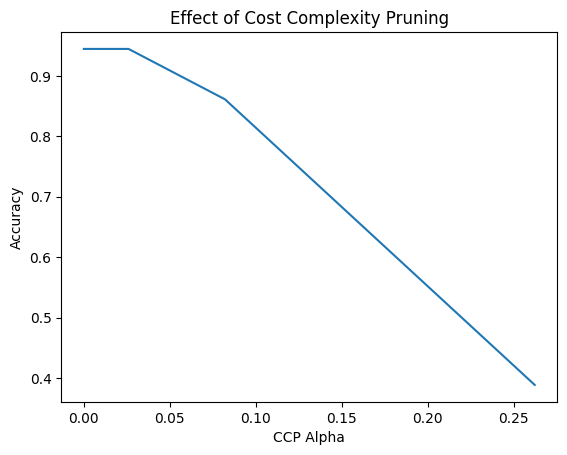

In [12]:
# Apply Cost Complexity Pruning (CCP) and visualize accuracy impact
import matplotlib.pyplot as plt

ccp_alphas = clf.cost_complexity_pruning_path(X_train_cls, y_train_cls)["ccp_alphas"]
accuracies = []
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_pruned.fit(X_train_cls, y_train_cls)
    accuracies.append(accuracy_score(y_test_cls, clf_pruned.predict(X_test_cls)))

plt.plot(ccp_alphas, accuracies)
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning")
plt.show()

In [13]:
# Evaluate using Precision, Recall, and F1-Score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



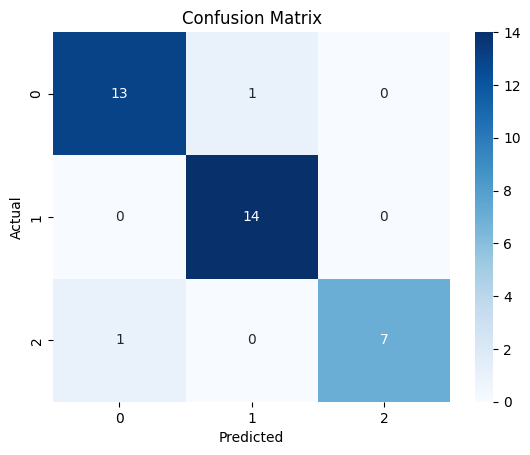

In [14]:
# Visualize the confusion matrix using seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_cls, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Use GridSearchCV to find optimal max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_cls, y_train_cls)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 5}
Best Accuracy: 0.9224137931034484


In [ ]:

Theory Questions


In [ ]:
Q1: What is a Decision Tree?
A Decision Tree is a supervised learning algorithm used for classification and regression. 
It splits data based on feature conditions to form a tree-like structure.

In [ ]:
Q2: What are impurity measures in Decision Trees?
Impurity measures (e.g., Gini Impurity, Entropy) help determine how well a split separates the data.

In [ ]:
Q3: Gini Impurity Formula
Gini = 1 - sum(p^2) for each class probability p.

In [ ]:
Q4: Entropy Formula
Entropy = -sum(p * log2(p)) for each class probability p.

In [ ]:
Q5: What is Information Gain?
Information Gain measures the reduction in entropy after a split. Higher gain means a better split.

In [ ]:
Q6: Difference between Gini and Entropy?
Gini is computationally simpler, while Entropy considers probability distribution more.

In [ ]:
Q7: Mathematical Explanation of Decision Trees
Decision Trees use recursive binary splitting based on impurity measures to form a structure that minimizes loss.

In [ ]:
Q8: What is Pre-Pruning?
Pre-Pruning stops tree growth early based on conditions like depth or node impurity.

In [ ]:
Q9: What is Post-Pruning?
Post-Pruning removes weak branches after full tree growth to improve generalization.

In [ ]:
Q10: Difference between Pre-Pruning and Post-Pruning?
Pre-Pruning halts before overfitting, while Post-Pruning trims overgrown trees.

In [ ]:
Q11: What is a Decision Tree Regressor?
A Decision Tree Regressor predicts continuous values instead of classes by splitting based on minimizing variance.

In [ ]:
Q12: Advantages & Disadvantages of Decision Trees
Advantages: Easy interpretation, no scaling required. Disadvantages: Prone to overfitting, sensitive to noisy data.

In [ ]:
Q13: How does a Decision Tree handle missing values?
It can use surrogate splits or ignore missing values during training.

In [ ]:
Q14: How does a Decision Tree handle categorical features?
It can use one-hot encoding or split based on categorical values directly.

In [ ]:
Q15: Real-world applications of Decision Trees?
Used in credit scoring, medical diagnosis, recommendation systems, etc.